LE QUERNEC Loévan, EL HACHEM Gabriel, and FALCK Jade, DIA2

# BI & DataViz / Machine learning for CV project: Human Action Recognition (HAR)

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Illustration of the problem

### Understanding the Problem

In modern artificial intelligence, particularly in deep learning, one of the central tasks is to create models that can understand and make predictions based on complex, high-dimensional data such as images, videos, and text. In the case of image classification, for example, the goal is for a machine learning model to correctly identify objects within images—whether it’s a cat, a dog, or a car. The problem we are addressing is how to make these models not only accurate but also interpretable, allowing us to understand what the model has learned and why it makes certain predictions.

Deep learning models, especially Convolutional Neural Networks (CNNs), excel in extracting useful patterns from images. However, these networks operate as black boxes, meaning that once trained, they can provide predictions without explaining how they arrived at those conclusions. The challenge is understanding the internal processes of the model and identifying the most important features that influence its decisions.


### Why This Is Important

As AI becomes more prevalent in critical domains like healthcare, finance, and autonomous driving, it's increasingly important that we can explain and trust the decisions made by these systems. For instance, if an AI model misidentifies a medical image, the consequences could be severe. Without a way to interpret the model’s behavior, identifying and fixing such errors becomes nearly impossible.

By understanding how a model makes decisions—such as which image features it focuses on most—we can ensure that it’s learning meaningful patterns. This helps improve model reliability and fairness. If a model is basing its decisions on irrelevant or biased features, we can step in to correct that before it leads to poor predictions in the real world.


### What Makes This Interesting

The process of interpreting a deep learning model opens up several avenues for improvement and optimization. By examining which features or parts of an image are most influential in making a prediction, we can:

- **Improve model accuracy:** If the model is making incorrect predictions because it focuses on the wrong parts of an image, understanding where the issue lies allows us to refine the model or its training process.

- **Reduce complexity:** Neural networks, especially deep ones, can be computationally expensive. By understanding which features are the most important, we can simplify the model by focusing on these key elements, improving both speed and efficiency.

- **Enhance interpretability:** In many real-world applications, especially those involving human subjects, being able to explain why a model made a certain decision is essential. Interpretability fosters trust, especially when the model is deployed in safety-critical systems, such as self-driving cars or medical diagnoses.

- **Ensure fairness:** If we can interpret the features that the model focuses on, we can assess whether it is making decisions based on biased or unfair patterns. For example, in medical applications, we need to ensure that the model is not discriminating against certain groups of people based on irrelevant factors, like skin color or gender.


### Practical Applications

- **Healthcare:** In medical image classification (e.g., identifying tumors in X-rays), interpretability helps doctors trust the AI model’s recommendations. If the AI highlights the wrong area of an image when diagnosing a tumor, the doctor can intervene before making a wrong diagnosis.

- **Autonomous driving:** Self-driving cars need to identify objects in their environment (pedestrians, other vehicles, traffic signs) in real-time. By understanding which parts of the image the model focuses on, engineers can ensure that the car is making safe and reliable decisions based on the right information.

- **Financial decision-making:** AI models used in finance for credit scoring or fraud detection need to be interpretable so that decisions made about individuals can be explained and justified. Transparency is also important for auditing and regulatory purposes.


### Broader Impact on AI Development

Understanding how models make decisions and identifying key features also contributes to the broader field of explainable AI (XAI). As AI becomes more integrated into everyday life, it’s essential that we not only create models that perform well but also ensure that they are transparent, explainable, and accountable. This is particularly important as AI begins to take on more roles that affect people's lives in significant ways.


### Conclusion

The exercise you’re embarking on is not just about improving the performance of a specific model, but also about gaining insights into how that model functions and why it makes the predictions it does. By focusing on which features of an image are most important to the model, you’re learning how to build more robust, efficient, and trustworthy AI systems—systems that not only make accurate predictions but can also explain why and how they arrived at those conclusions. This approach is essential for building AI models that are reliable, fair, and ready for real-world applications where transparency and trust are crucial.

## Data visualization

In [2]:
# define the paths
train_dir = 'train'
test_dir = 'test'
train_csv = 'training_set.csv' # file with labeled data
test_csv = 'testing_set.csv' # file with unlabeled data

In [3]:
import pandas as pd

# load the data
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [4]:
# count the occurrences of each label
print("Number of lines in the training set:", len(train_df), "\n")
print(train_df['label'].value_counts())

Number of lines in the training set: 12600 

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64


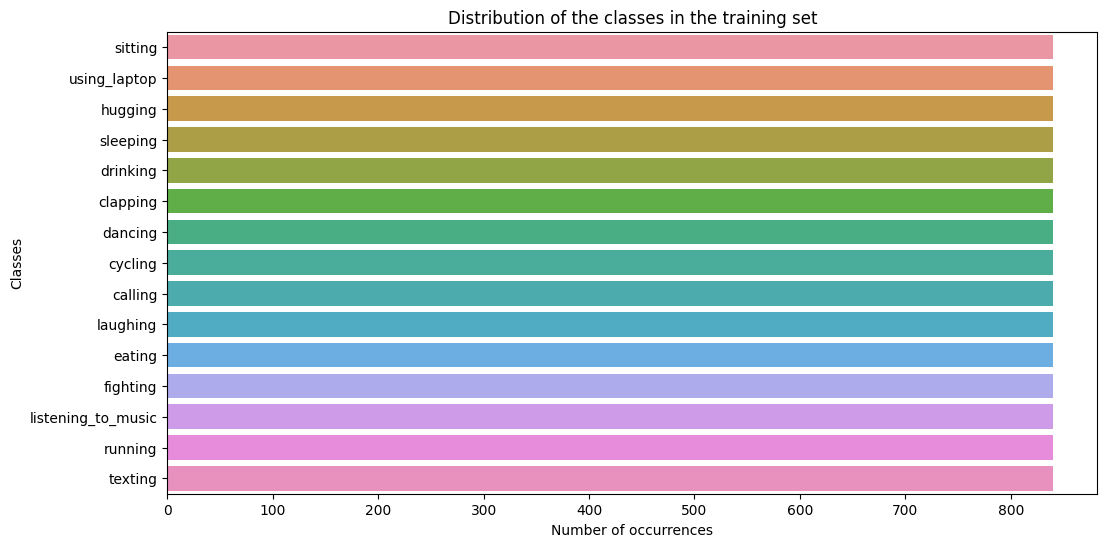

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the distribution of the labels
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title('Distribution of the classes in the training set')
plt.xlabel('Number of occurrences')
plt.ylabel('Classes')
plt.show()

What we see is that the data is perfectly balanced, which is a good thing for the training of our model. Do a visualization of the data to see the distribution of the classes is then not necessary.

## Methodology

In [6]:
from graphviz import Digraph

def create_flowchart():
    # initialize the flowchart
    flowchart = Digraph('Workflow', format='png')
    flowchart.attr(rankdir='LR', size='23')

    # add nodes for each step
    flowchart.node('A', 'Understand the problem\n(why are we doing this?)')
    flowchart.node('B', 'Collect the data\n(train and test sets)')
    flowchart.node('C', 'Explore the data\n(visualize, understand)')
    flowchart.node('D', 'Image preprocessing\n(resize, normalize)')
    flowchart.node('E', 'Feature extraction\n(for all images)')
    flowchart.node('F', 'Model training\n(for each model)')
    flowchart.node('G', 'Computational evaluation\nCNN\n(accuracy, precision)')
    flowchart.node('H', 'Computational evaluation\nMobileNet\n(accuracy, precision)')
    flowchart.node('I', 'Computational visualization\n(for each model)')
    flowchart.node('J', 'Comparison and insights')

    # add edges to show the flow
    flowchart.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'FH', 'GI', 'HI', 'IJ'])

    # render and save the flowchart
    flowchart.render('workflow_diagram', cleanup=True)
    print("Flowchart saved as 'workflow_diagram.png'.")

create_flowchart()

Flowchart saved as 'workflow_diagram.png'.


### Workflow

Here is the workflow we will follow to solve the problem:

![Diagram](workflow_diagram.png)

### Tools we used

Python: The primary programming language for image processing, model training, and evaluation. Key libraries include:
- TensorFlow with Keras:
    - For image loading and preprocessing.
    - For building, training, and evaluating the CNN and MobileNet models.
- Matplotlib and Seaborn: For additional data visualization.

## Computational results

### Extraction of caracteristics

Now we will encode the labels of the actions to integers. This will allow us to use them in the model. We will be able to retrieve the original labels with the variable `label_mapping`.

In [7]:
# encode the labels
label_mapping = {label: idx for idx, label in enumerate(train_df['label'].unique())}
train_df['label_idx'] = train_df['label'].map(label_mapping)

In [8]:
print(label_mapping)

{'sitting': 0, 'using_laptop': 1, 'hugging': 2, 'sleeping': 3, 'drinking': 4, 'clapping': 5, 'dancing': 6, 'cycling': 7, 'calling': 8, 'laughing': 9, 'eating': 10, 'fighting': 11, 'listening_to_music': 12, 'running': 13, 'texting': 14}


The function `load_images_from_dataframe` will allow us to load the images from the dataframe and resize them to the desired size. It also normalizes the pixel values to the range [0, 1].

In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_width, img_height = 128, 128 # dimensions of our images

# prepare the training data
def load_images_from_dataframe(df, directory, img_width, img_height):
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = os.path.join(directory, row['filename'])
        print(img_path)
        if os.path.exists(img_path):
            # load and rescale the image
            img = load_img(img_path, target_size=(img_width, img_height))
            img_array = img_to_array(img) / 255.0 # normalize
            images.append(img_array)
            if 'label_idx' in row:
                labels.append(row['label_idx'])
    return np.array(images), np.array(labels)

In [10]:
from tensorflow.keras.utils import to_categorical

# load the traing images
X_train, y_train = load_images_from_dataframe(train_df, train_dir, img_width, img_height)
y_train = to_categorical(y_train, num_classes=len(label_mapping))

train\Image_1.jpg
train\Image_2.jpg
train\Image_3.jpg
train\Image_4.jpg
train\Image_5.jpg
train\Image_6.jpg
train\Image_7.jpg
train\Image_8.jpg
train\Image_9.jpg
train\Image_10.jpg
train\Image_11.jpg
train\Image_12.jpg
train\Image_13.jpg
train\Image_14.jpg
train\Image_15.jpg
train\Image_16.jpg
train\Image_17.jpg
train\Image_18.jpg
train\Image_19.jpg
train\Image_20.jpg
train\Image_21.jpg
train\Image_22.jpg
train\Image_23.jpg
train\Image_24.jpg
train\Image_25.jpg
train\Image_26.jpg
train\Image_27.jpg
train\Image_28.jpg
train\Image_29.jpg
train\Image_30.jpg
train\Image_31.jpg
train\Image_32.jpg
train\Image_33.jpg
train\Image_34.jpg
train\Image_35.jpg
train\Image_36.jpg
train\Image_37.jpg
train\Image_38.jpg
train\Image_39.jpg
train\Image_40.jpg
train\Image_41.jpg
train\Image_42.jpg
train\Image_43.jpg
train\Image_44.jpg
train\Image_45.jpg
train\Image_46.jpg
train\Image_47.jpg
train\Image_48.jpg
train\Image_49.jpg
train\Image_50.jpg
train\Image_51.jpg
train\Image_52.jpg
train\Image_53.jpg
tr

In [11]:
# load the test images
X_test, _ = load_images_from_dataframe(test_df, test_dir, img_width, img_height)

test\Image_1.jpg
test\Image_2.jpg
test\Image_3.jpg
test\Image_4.jpg
test\Image_5.jpg
test\Image_6.jpg
test\Image_7.jpg
test\Image_8.jpg
test\Image_9.jpg
test\Image_10.jpg
test\Image_11.jpg
test\Image_12.jpg
test\Image_13.jpg
test\Image_14.jpg
test\Image_15.jpg
test\Image_16.jpg
test\Image_17.jpg
test\Image_18.jpg
test\Image_19.jpg
test\Image_20.jpg
test\Image_21.jpg
test\Image_22.jpg
test\Image_23.jpg
test\Image_24.jpg
test\Image_25.jpg
test\Image_26.jpg
test\Image_27.jpg
test\Image_28.jpg
test\Image_29.jpg
test\Image_30.jpg
test\Image_31.jpg
test\Image_32.jpg
test\Image_33.jpg
test\Image_34.jpg
test\Image_35.jpg
test\Image_36.jpg
test\Image_37.jpg
test\Image_38.jpg
test\Image_39.jpg
test\Image_40.jpg
test\Image_41.jpg
test\Image_42.jpg
test\Image_43.jpg
test\Image_44.jpg
test\Image_45.jpg
test\Image_46.jpg
test\Image_47.jpg
test\Image_48.jpg
test\Image_49.jpg
test\Image_50.jpg
test\Image_51.jpg
test\Image_52.jpg
test\Image_53.jpg
test\Image_54.jpg
test\Image_55.jpg
test\Image_56.jpg
t

### Training

Specify the model(s) you want to launch the training and create a model file:

In [12]:
cnn = 0
mobilenet = 0

# hyperparameters
batch_size = 32
epochs = 15

Divide the data into training and validation sets. We will use 80% of the data for training and 20% for validation.

In [13]:
from sklearn.model_selection import train_test_split

# separate the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

First model tested, **CNN**:

In [ ]:
if cnn:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    # build a simple CNN
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(label_mapping), activation='softmax')
    ])

    # compile the model
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # train the model
    cnn_model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val)
    )

    # save the model
    cnn_model.save('cnn_model.h5')

Second model tested, **MobileNet**:

In [15]:
if mobilenet:
    from tensorflow.keras.applications import MobileNetV2
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
    from tensorflow.keras.optimizers import SGD
    from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # load the MobileNetV2 base model
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # add a custom head to the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(len(label_mapping), activation='softmax')(x)

    # create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # 
    for layer in base_model.layers:
        layer.trainable = False

    # compile the model with a SGD optimizer
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # define the callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    model_checkpoint = ModelCheckpoint('mobilenet_best_model.h5', save_best_only=True, monitor='val_loss', verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    # data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # train the model with data augmentation
    train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)
    model.fit(
        train_generator,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint, reduce_lr]
    )

    # fine-tune the model
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # re-compile the model with a lower learning rate
    optimizer_finetune = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=optimizer_finetune, loss='categorical_crossentropy', metrics=['accuracy'])

    # re-train the model with fine-tuning
    model.fit(
        train_generator,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, model_checkpoint, reduce_lr]
    )

    # save the model
    model.save('mobilenet_model.h5')

### Predictions

Select the model you want to use to make the predictions and have the results:

In [39]:
import tensorflow as tf

# load the model
cnn_model = tf.keras.models.load_model(f'cnn_model.h5')
mobilenet_model = tf.keras.models.load_model(f'mobilenet_model.h5')

Here, we make the predictions on the training set to evaluate the model's performance, then on the test set to see how it generalizes to new, unseen data, with the **CNN** model.

In [17]:
# make the predictions
print("Train predictions on the CNN model:")
cnn_train_predictions = cnn_model.predict(X_train)
cnn_train_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in cnn_train_predictions]

print("Test predictions on the CNN model:")
cnn_test_predictions = cnn_model.predict(X_test)
cnn_test_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in cnn_test_predictions]

Train predictions on the CNN model:
315/315 [==============================] - 7s 23ms/step
Test predictions on the CNN model:
169/169 [==============================] - 4s 22ms/step


Same here but with the **MobileNet** model.

In [40]:
# make the predictions
print("Train predictions on the MobileNet model:")
mobilenet_train_predictions = mobilenet_model.predict(X_train)
mobilenet_train_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in mobilenet_train_predictions]

print("Test predictions on the MobileNet model:")
mobilenet_test_predictions = mobilenet_model.predict(X_test)
mobilenet_test_predicted_labels = [list(label_mapping.keys())[np.argmax(pred)] for pred in mobilenet_test_predictions]

Train predictions on the MobileNet model:
315/315 [==============================] - 20s 59ms/step
Test predictions on the MobileNet model:
169/169 [==============================] - 10s 58ms/step


### Results

#### Accuracy

We are able to calculate the accuracies of the models on the training set, and then visualize these accuracies.

In [41]:
# calculate the accuracy on the training set
true_train_labels = [list(label_mapping.keys())[label] for label in np.argmax(y_train, axis=1)]

cnn_correct_predictions = sum(pred == true for pred, true in zip(cnn_train_predicted_labels, true_train_labels))
cnn_train_accuracy = cnn_correct_predictions / len(true_train_labels) * 100

print(f"CNN accuracy on the training set: {cnn_train_accuracy:.2f}%")

mobilenet_correct_predictions = sum(pred == true for pred, true in zip(mobilenet_train_predicted_labels, true_train_labels))
mobilenet_train_accuracy = mobilenet_correct_predictions / len(true_train_labels) * 100

print(f"MobileNet accuracy on the training set: {mobilenet_train_accuracy:.2f}%")

CNN accuracy on the training set: 98.61%
MobileNet accuracy on the training set: 79.67%


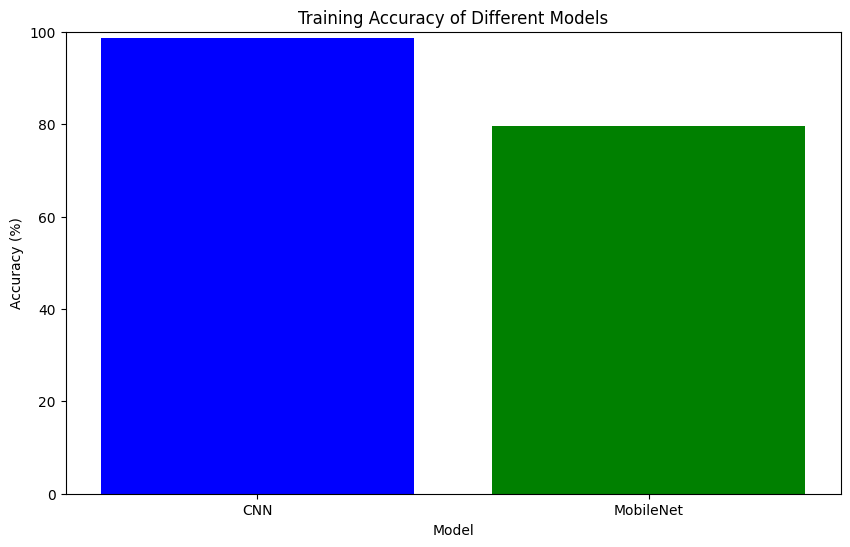

In [42]:
# accuracies
accuracies = {
    'CNN': cnn_train_accuracy,
    'MobileNet': mobilenet_train_accuracy
}

# plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy of Different Models')
plt.ylim(0, 100)
plt.show()

Now, the 2 confusion matrices of the models on the training set (**CNN** and **MobileNet**).

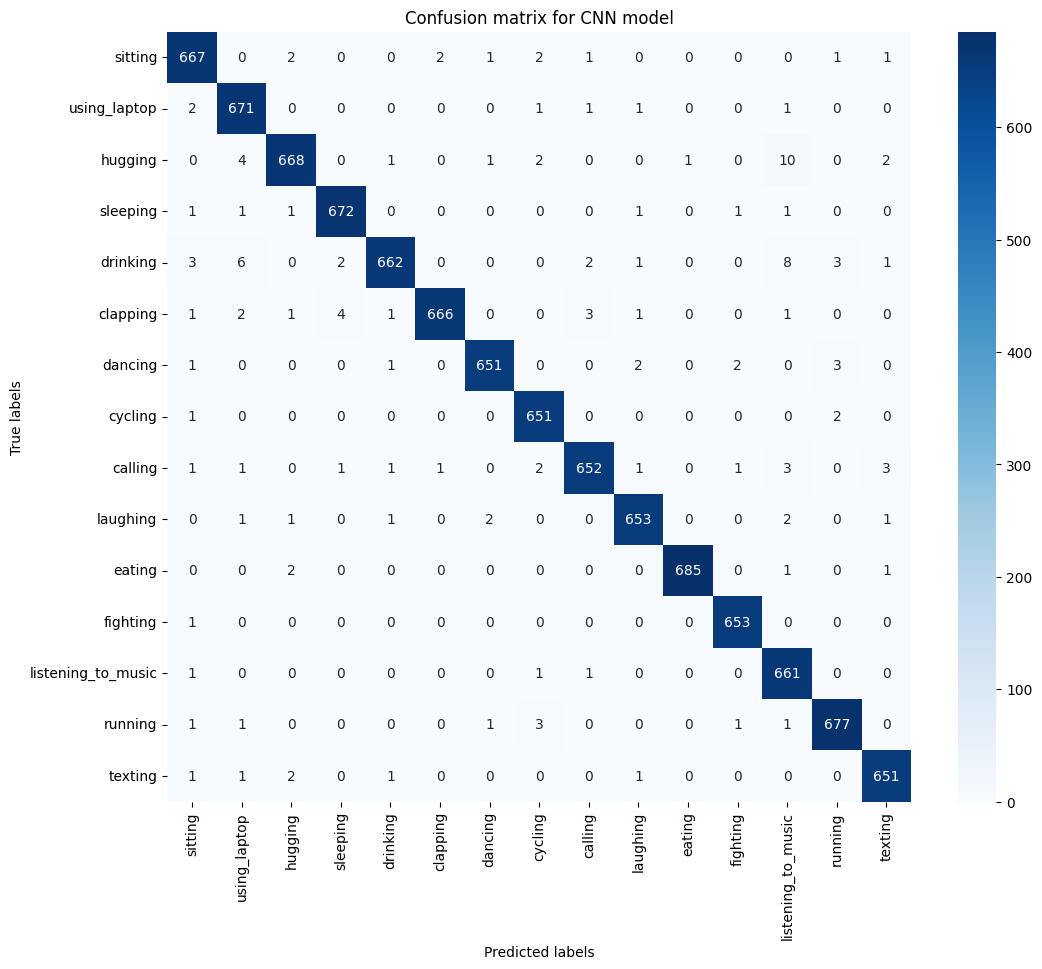

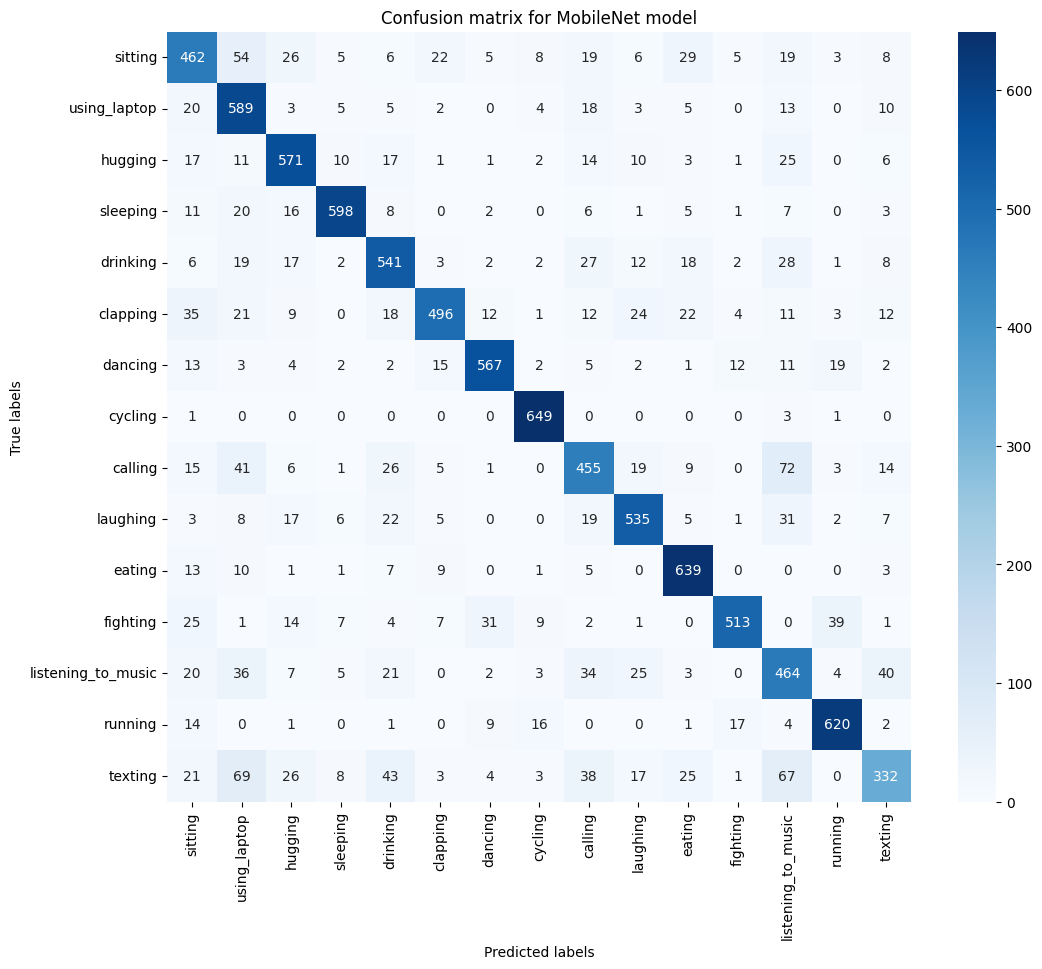

In [21]:
from sklearn.metrics import confusion_matrix

# function to plot heatmap of confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, model_name):
    cm = confusion_matrix(true_labels, predicted_labels, labels=list(label_mapping.keys()))
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion matrix for {model_name}')
    plt.show()

# plot for CNN model
plot_confusion_matrix(true_train_labels, cnn_train_predicted_labels, 'CNN model')

# plot for MobileNet model
plot_confusion_matrix(true_train_labels, mobilenet_train_predicted_labels, 'MobileNet model')

#### Images with predictions

Here, we display the first 10 images of the training set with the predictions of the **CNN** model.

In [22]:
# function to display images with predictions and true labels
def display_images_with_predictions_and_true_labels(images, predictions, true_labels, num_images=10):
    # limit the number of images
    num_images = min(num_images, len(images))
    
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1) # 2 rows, 5 columns
        plt.imshow(images[i])
        plt.axis('off')
        
        # compare the prediction with the true label
        predicted_label = predictions[i]
        true_label = true_labels[i]
        color = "green" if predicted_label == true_label else "red"
        
        # add the title and the color
        plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color, fontsize=12)
    
    plt.tight_layout()
    plt.show()

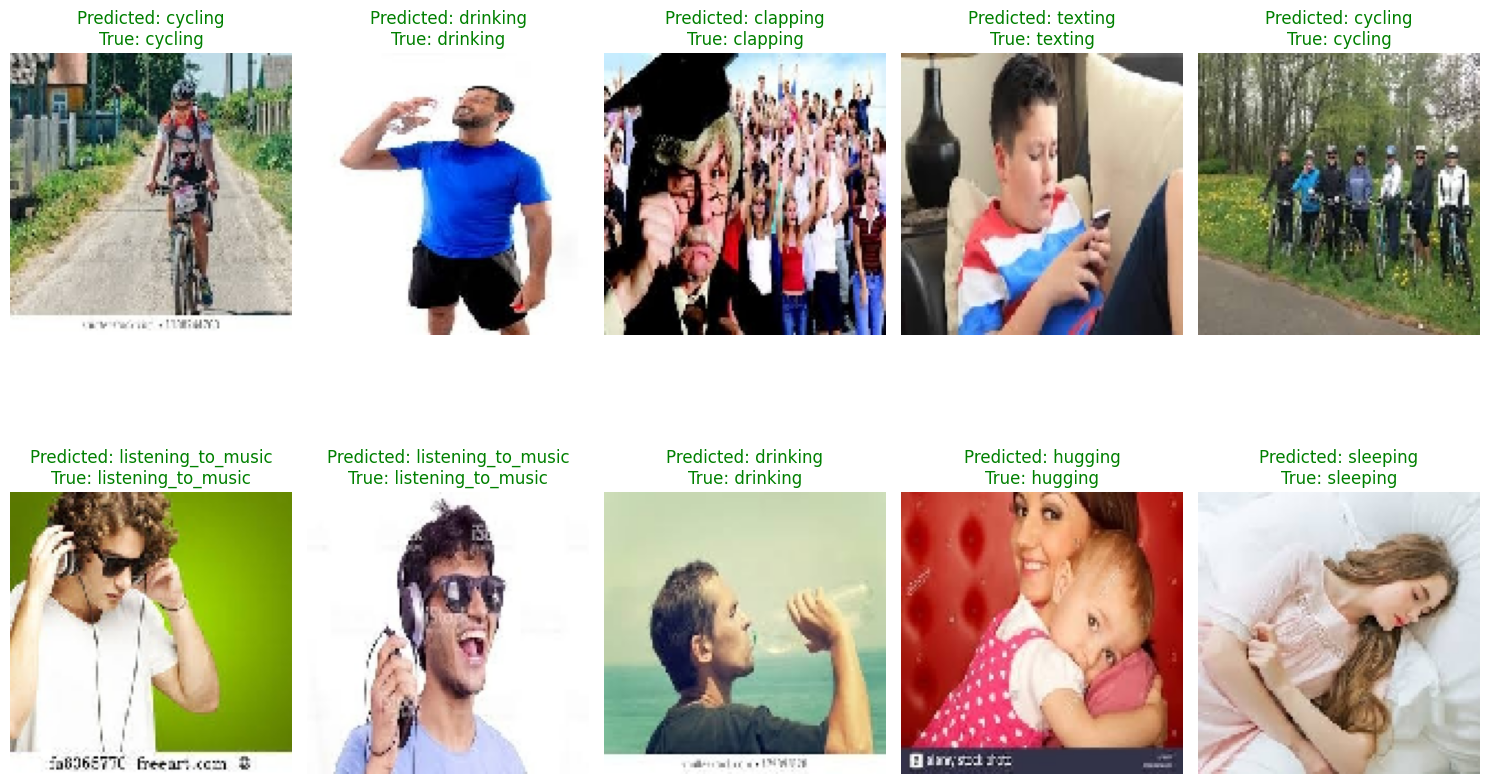

In [23]:
X_train_display = (X_train * 255).astype(np.uint8) # convert back to 0-255 range

# print the first 10 images with predictions and true labels
display_images_with_predictions_and_true_labels(
    images=X_train_display[:10],
    predictions=cnn_train_predicted_labels[:10],
    true_labels=true_train_labels
)

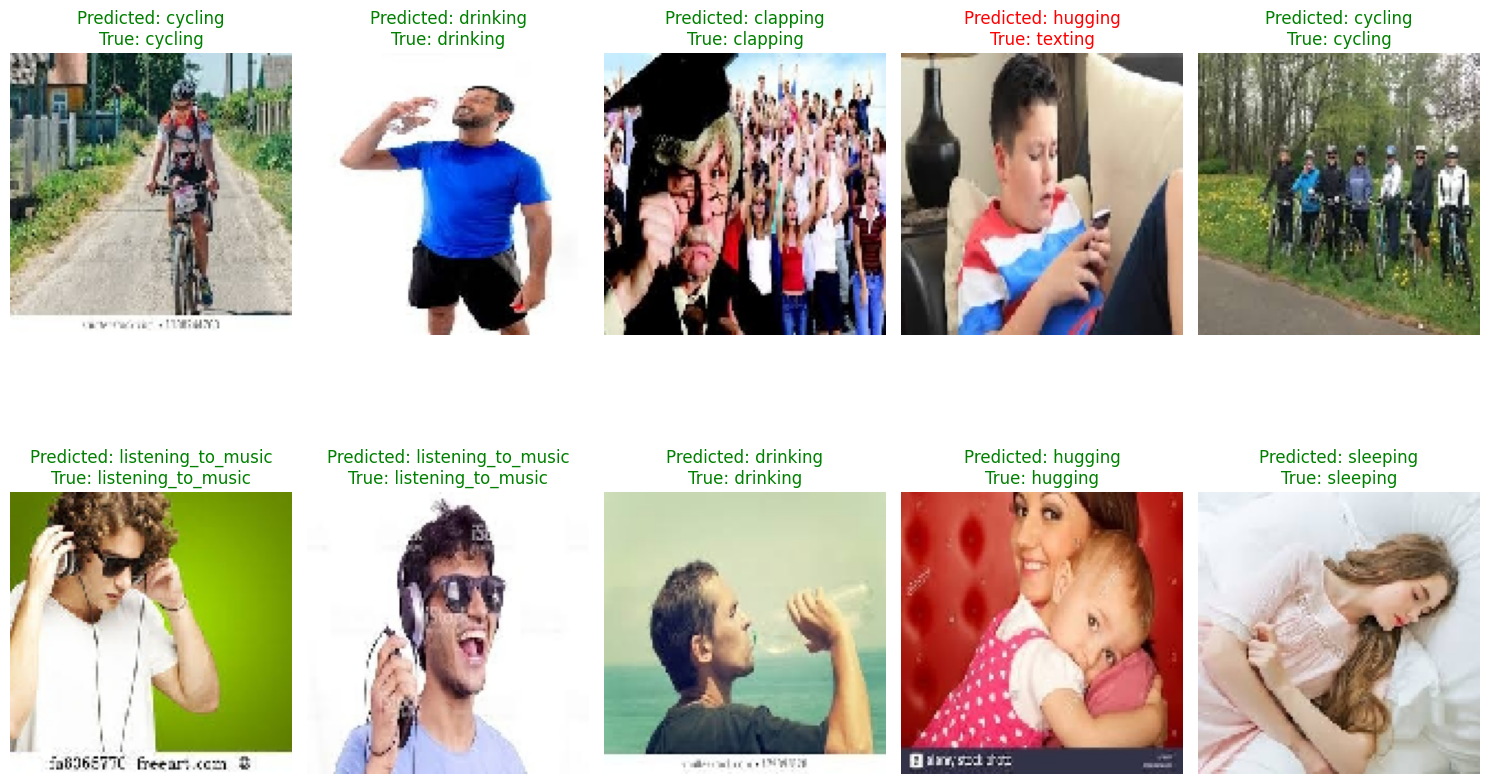

In [43]:
X_train_display = (X_train * 255).astype(np.uint8) # convert back to 0-255 range

# print the first 10 images with predictions and true labels
display_images_with_predictions_and_true_labels(
    images=X_train_display[:10],
    predictions=mobilenet_train_predicted_labels[:10],
    true_labels=true_train_labels
)

Same here, but without any true labels. We can simply check with our own eyes if the predictions are correct.

In [24]:
# function to display images with predictions
def display_images_with_predictions(images, predictions, num_images=10):
    # limit the number of images
    num_images = min(num_images, len(images))
    
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1) # 2 rows, 5 columns
        plt.imshow(images[i])
        plt.axis('off')

        plt.title(f"Predicted: {predictions[i]}", fontsize=12)
    
    plt.tight_layout()
    plt.show()

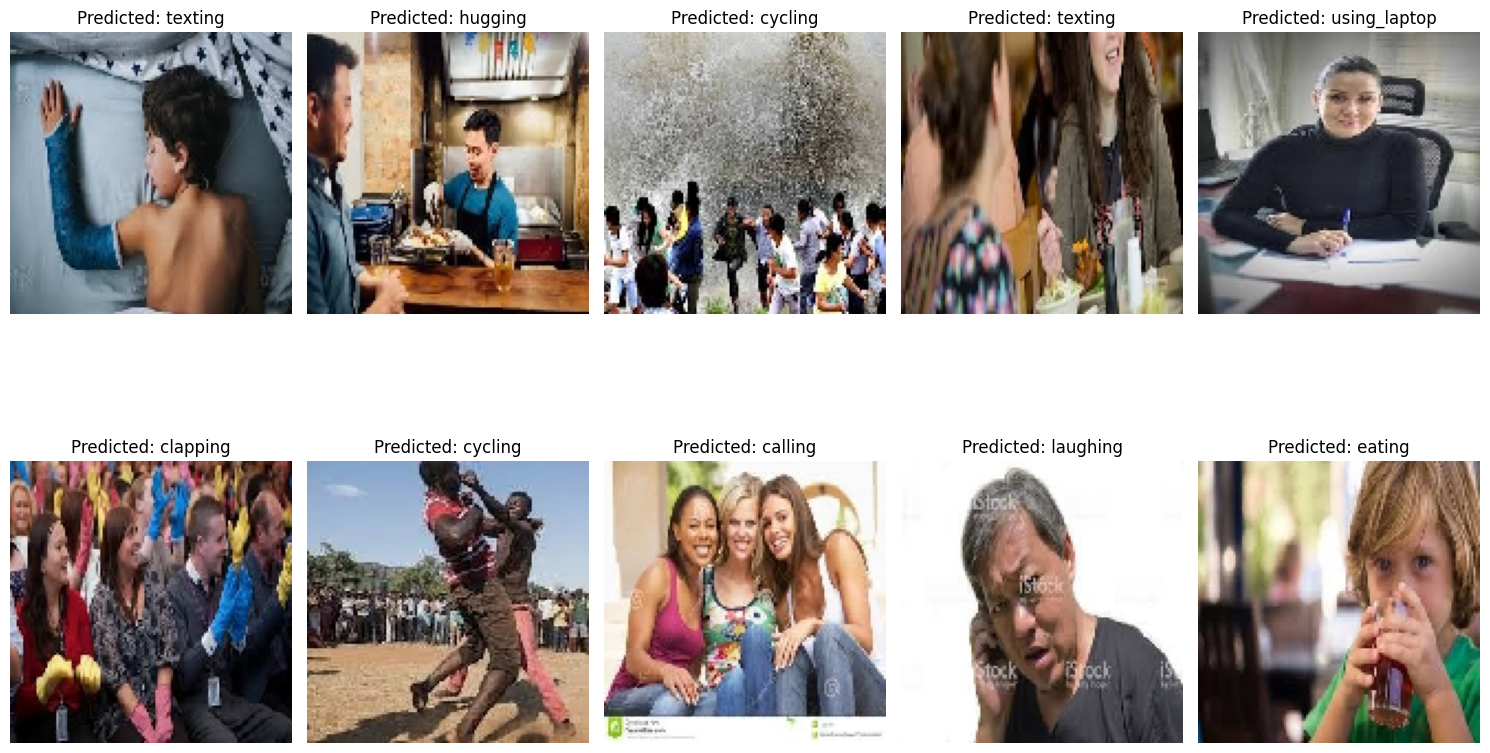

In [25]:
X_test_display = (X_test * 255).astype(np.uint8) # convert back to 0-255 range

# print the first 10 images with predictions
display_images_with_predictions(
    images=X_test_display[:10],
    predictions=cnn_test_predicted_labels[:10]
)

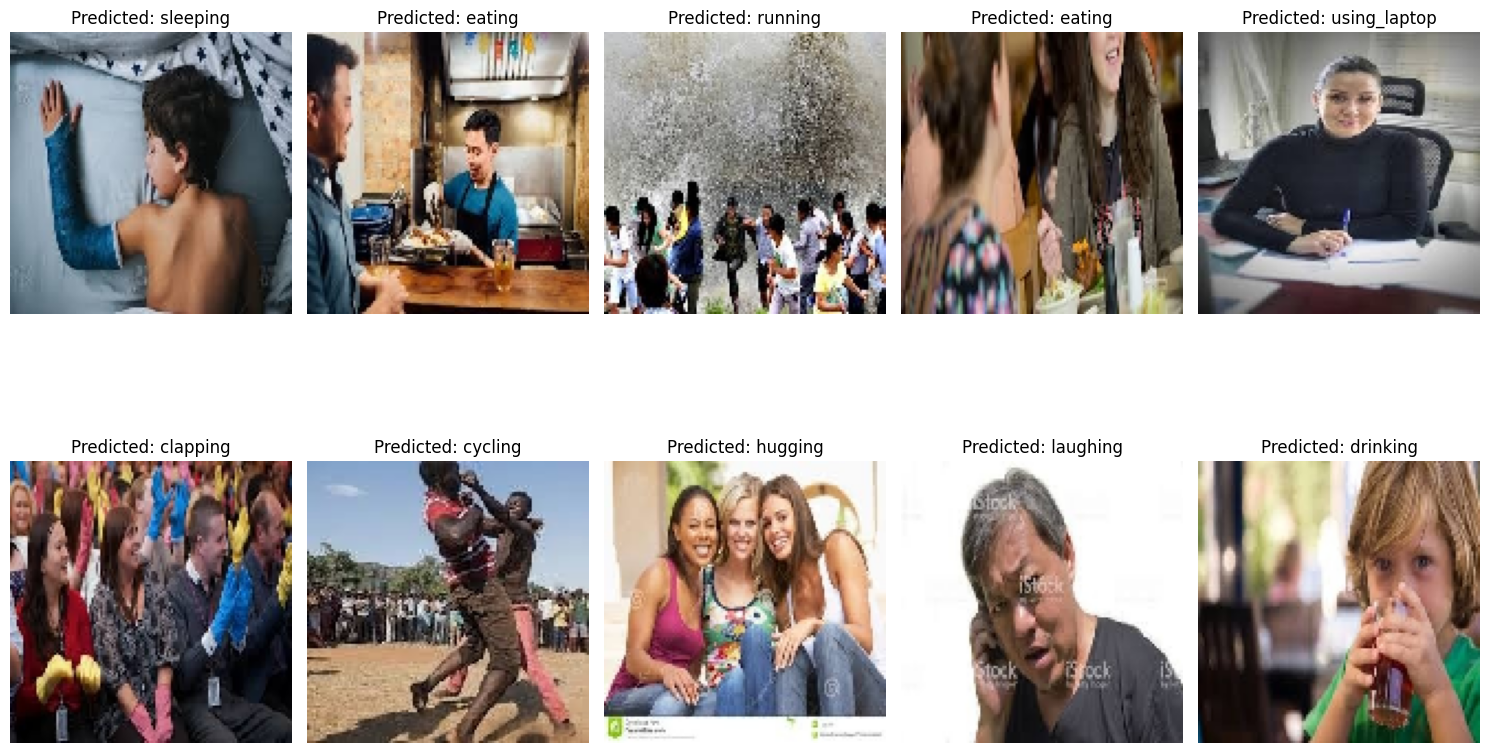

In [44]:
X_test_display = (X_test * 255).astype(np.uint8) # convert back to 0-255 range

# print the first 10 images with predictions
display_images_with_predictions(
    images=X_test_display[:10],
    predictions=mobilenet_test_predicted_labels[:10]
)

#### Activation maps

This part concerns the activation maps of the **CNN** model. We display the activation maps of the first 10 images of the training set, by getting top channels by variance, mean, and max.

What are activation maps? Activation maps are a way to visualize the output of a convolutional layer in a CNN. They show the regions of the input image that are most important for the model's prediction. By visualizing these maps, we can gain insights into what features the model is focusing on when making decisions.

In [26]:
def get_top_channels_by_variance(activation_maps, top_k=8):
    # check the dimensions of the activation maps
    if len(activation_maps.shape) == 3: # single image (height, width, channels)
        channel_variances = np.var(activation_maps, axis=(0, 1))
    elif len(activation_maps.shape) == 4: # batch of images (batch, height, width, channels)
        channel_variances = np.var(activation_maps, axis=(0, 1, 2))
    else:
        raise ValueError("Unexpected dimensions for activation_maps: {}".format(activation_maps.shape))
    
    # find the indices of the top-k channels with highest variance
    top_channels = np.argsort(channel_variances)[-top_k:]

    return top_channels

In [27]:
def get_top_channels_by_mean(activation_maps, top_k=8):
    # check the dimensions of the activation maps
    if len(activation_maps.shape) == 2: # (positions, channels)
        channel_means = np.mean(activation_maps, axis=0)
    elif len(activation_maps.shape) == 3: # (height, width, channels)
        channel_means = np.mean(activation_maps, axis=(0, 1))
    else:
        raise ValueError(f"Unexpected dimensions for activation_maps: {activation_maps.shape}")
    
    # find the indices of the top-k channels with highest mean
    top_channels = np.argsort(channel_means)[-top_k:]

    return top_channels

In [28]:
def get_top_channels_by_max(activation_maps, top_k=8):
    # check the dimensions of the activation maps
    if len(activation_maps.shape) == 2: # (positions, channels)
        channel_max = np.max(activation_maps, axis=0)
    elif len(activation_maps.shape) == 3: # (height, width, channels)
        channel_max = np.max(activation_maps, axis=(0, 1))
    else:
        raise ValueError(f"Unexpected dimensions for activation_maps: {activation_maps.shape}")
    
    # find the indices of the top-k channels with highest max
    top_channels = np.argsort(channel_max)[-top_k:]

    return top_channels

In [29]:
def display_important_activation_maps(activation_maps, image, important_channels, max_channels=8):
    # limit the number of channels
    important_channels = important_channels[:max_channels]
    
    # number of important channels
    num_channels = len(important_channels)
    fig, axes = plt.subplots(1, num_channels + 1, figsize=(20, 5))
    
    # display the original image
    axes[0].imshow(image.astype("uint8"))
    axes[0].set_title("Image originale")
    axes[0].axis('off')
    
    # display the important channels
    for i, channel in enumerate(important_channels):
        activation_map = activation_maps[:, :, channel]
        axes[i + 1].imshow(activation_map, cmap='viridis')
        axes[i + 1].set_title(f"Canal {channel}")
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [30]:
from tensorflow.keras.models import Model

def get_activation_maps(model, img_array, layer_name):
    # create a model that will return these outputs, given the model input
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(img_array)
    
    # check the dimensions of the intermediate output
    if len(intermediate_output.shape) == 4: # (batch, height, width, channels)
        return intermediate_output
    else:
        raise ValueError("Unexpected dimensions for activation maps.")

In [31]:
# get the activation maps for the first image
activation_maps = get_activation_maps(cnn_model, X_test, 'conv2d_2')

169/169 [==============================] - 4s 22ms/step


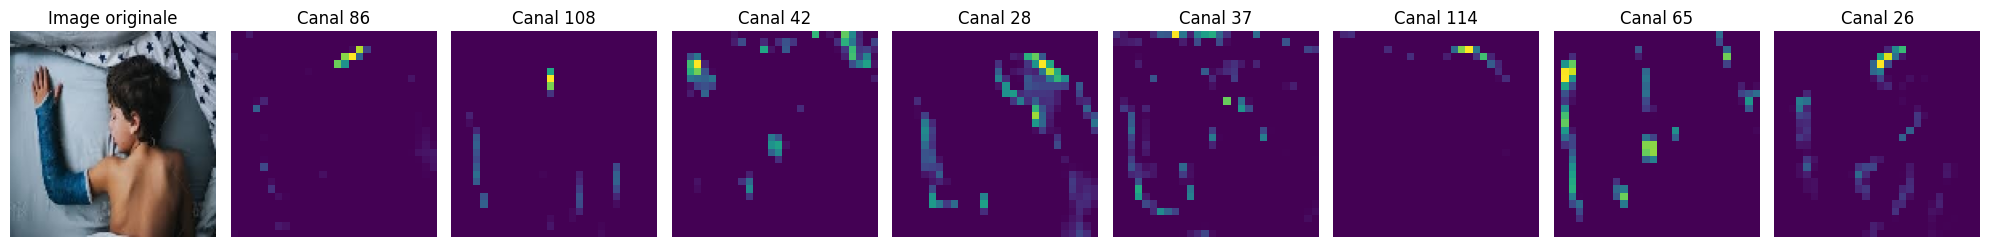

In [32]:
# get the top channels by variance
top_channels_variance = get_top_channels_by_variance(activation_maps[0], top_k=8)

# display the important activation maps
display_important_activation_maps(
    activation_maps=activation_maps[0],
    image=X_test_display[0],
    important_channels=top_channels_variance,
    max_channels=8
)

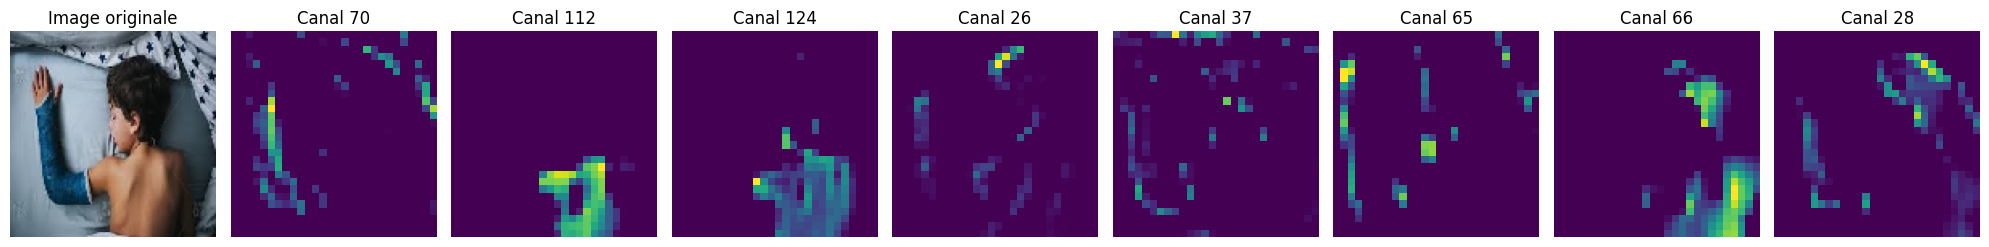

In [33]:
# get the top channels by mean
top_channels_mean = get_top_channels_by_mean(activation_maps[0], top_k=8)

# display the important activation maps
display_important_activation_maps(
    activation_maps=activation_maps[0],
    image=X_test_display[0],
    important_channels=top_channels_mean,
    max_channels=8
)

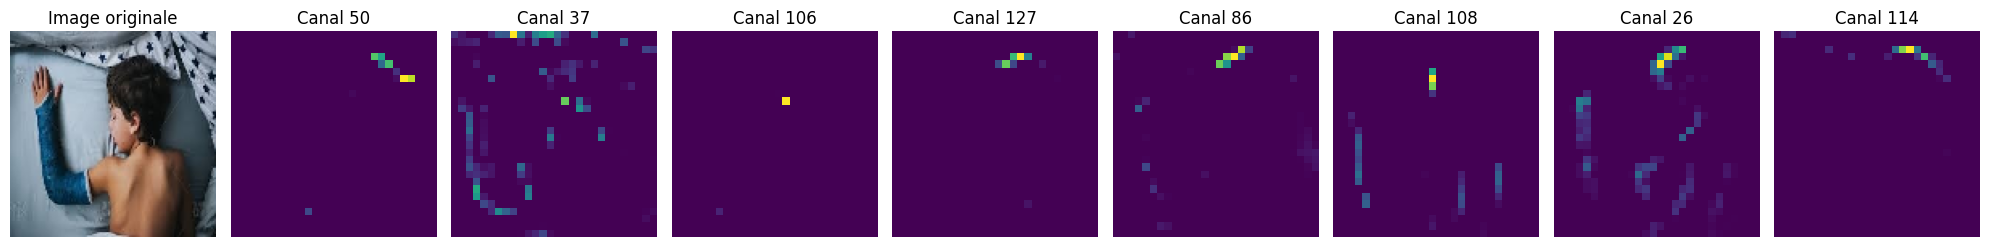

In [34]:
# get the top channels by max
top_channels_max = get_top_channels_by_max(activation_maps[0], top_k=8)

# display the important activation maps
display_important_activation_maps(
    activation_maps=activation_maps[0],
    image=X_test_display[0],
    important_channels=top_channels_max,
    max_channels=8
)

#### TSNE

Here is the part where we use the t-SNE algorithm to visualize the features extracted by the **MobileNet** model. We display the t-SNE plot of the features extracted from images of the training set.

What is t-SNE? t-SNE is a dimensionality reduction technique that is commonly used to visualize high-dimensional data in a lower-dimensional space. It works by preserving the local structure of the data, meaning that similar data points in the high-dimensional space will be close together in the lower-dimensional space. This allows us to visualize complex data in a more interpretable way.

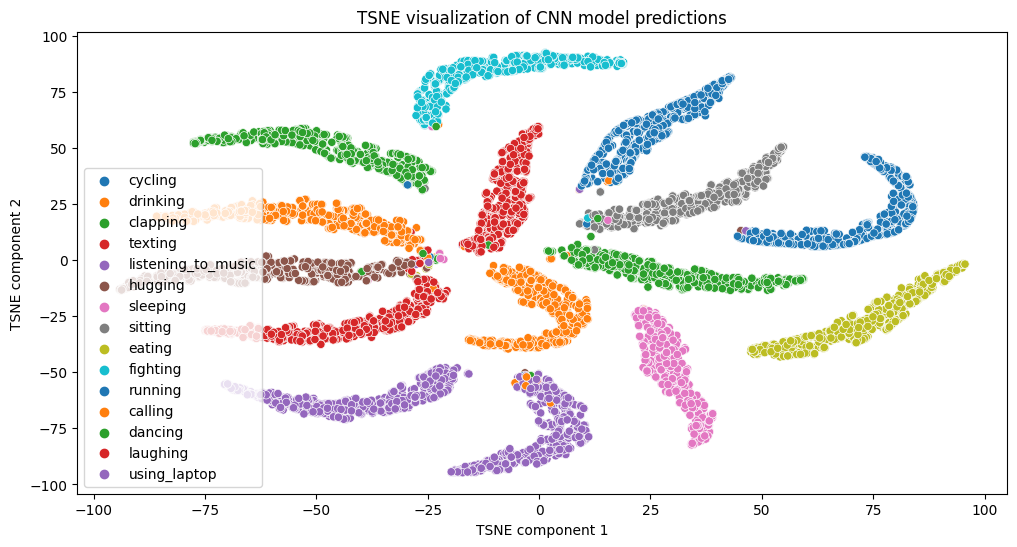

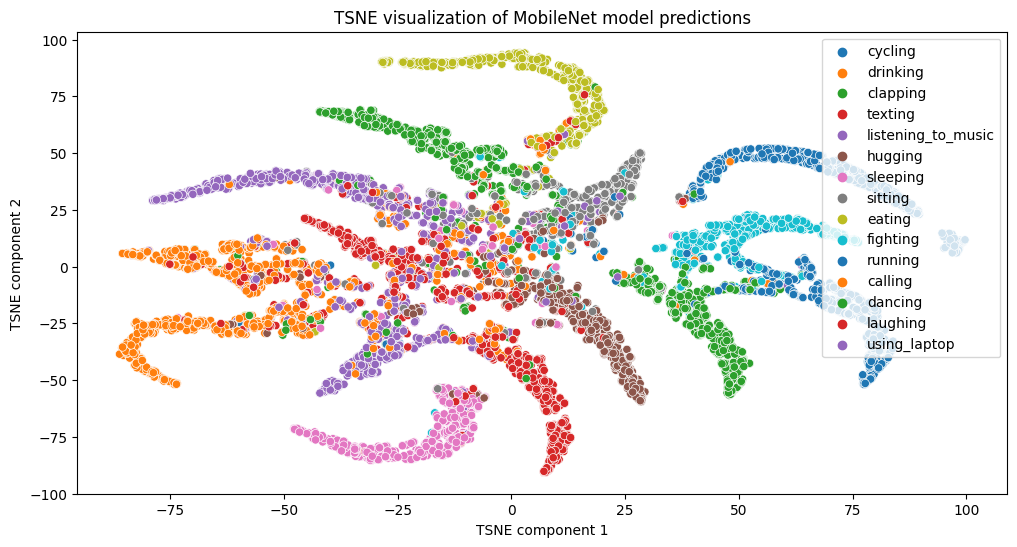

In [35]:
from sklearn.manifold import TSNE

# apply TSNE on the CNN model predictions
tsne = TSNE(n_components=2, random_state=42)
cnn_tsne_results = tsne.fit_transform(cnn_train_predictions)

# apply TSNE on the MobileNet model predictions
mobilenet_tsne_results = tsne.fit_transform(mobilenet_train_predictions)

# plot for CNN model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=cnn_tsne_results[:, 0], y=cnn_tsne_results[:, 1], hue=true_train_labels, palette='tab10', legend='full')
plt.title('TSNE visualization of CNN model predictions')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.show()

# plot for MobileNet model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=mobilenet_tsne_results[:, 0], y=mobilenet_tsne_results[:, 1], hue=true_train_labels, palette='tab10', legend='full')
plt.title('TSNE visualization of MobileNet model predictions')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.show()

## Analysis and interpretation

### What we can learn from the accuracy

Our **CNN** model has a really good accuracy, not far from the perfect score. This means that the model is able to correctly classify the actions in the training set with high accuracy. Its accuracy was 98.61%.

The **MobileNet** model has a slightly lower accuracy than the **CNN** model, but it is still good. Its accuracy was 79.67%.

What that means? It means that the **CNN** model is better at learning the features of the actions in the training set than the **MobileNet** model. On images that the **CNN** model has seen during training, it is able to make predictions with high accuracy.

### What we can learn from the predictions we made with the test set

BUT, when we use the models to make predictions on the test set, we see that the **MobileNet** model has a better accuracy than the **CNN** model. We can't quantify the accuracies on the test set, but visually, on the first 10 images, the **MobileNet** model seems to make better predictions than the **CNN** model.

What that means? It means that the **MobileNet** model is better at generalizing to new, unseen data than the **CNN** model. On images that the **MobileNet** model has never seen before, it is able to make predictions with higher accuracy than the **CNN** model.

### What we can learn from the activation maps

The activation maps of the **CNN** model show us which parts of the images are most important for the model's predictions. By visualizing these maps, we can see that the model focuses on different parts of the image for different actions. For example, for the action "sleeping", the model focuses on the face and upper body of the person.

### What we can learn from the t-SNE plots

From the t-SNE plot of the features extracted by the **CNN** model, we can see that the features are well separated in the lower-dimensional space. This means that the model is able to extract meaningful features from the images that help it classify the actions. The features of different actions are clustered together, which indicates that the model is learning to distinguish between the different actions based on these features.

The t-SNE plot of the features extracted by the **MobileNet** model shows a similar pattern, but with some overlap between the clusters. This indicates that the **MobileNet** model may not be as good at separating the features of different actions as the **CNN** model. However, the clusters are still well defined, which suggests that the **MobileNet** model is able to extract meaningful features from the images that help it classify the actions.